# Assumption: The independent variables are independent of each other.

# The implementation of polynomial regression is a two-step process. First, we transform our data into a polynomial using the PolynomialFeatures function from sklearn and then use linear regression to fit the parameters:

# X_train, X_test, y_train, y_test: train_test_split splits our features (poly_features) and responses (y) into train and test groups – here we just save these groups into variables. The order of the variables is very important, so don’t shuffle them.

In [39]:
#Load the Dataset
import pandas as pd

In [40]:
Employees = pd.read_csv('C:/Users/Admin/Machine Learning chapter 5/Position_Salaries.csv')
Employees

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [42]:
X = Employees.loc[:, 'Level'].values

In [44]:
Y = Employees.loc[:,'Salary'].values

In [47]:
X = X.reshape(-1, 1)

In [48]:
Y = Y.reshape(-1, 1)

In [49]:
# Step 2 - Fitting Linear Regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,Y)

LinearRegression()

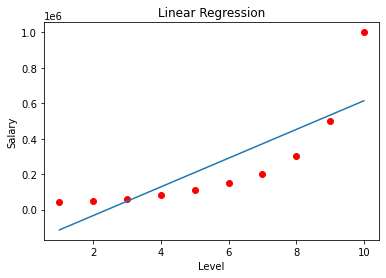

In [51]:
# Step 3 - Visualize Linear Regression Results
import matplotlib.pyplot as plt

plt.scatter(X,Y, color="red")
plt.plot(X, lin_reg.predict(X))
plt.title("Linear Regression")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

If we look at the graph below, we can see that a person at level 6.5 should be offered a salary of around $300k. We will confirm this in next step

In [60]:

# Evaluating model performance
print('R-square score is :', r2_score(Y,  lin_reg.predict(X)))

R-square score is : 0.6690412331929895


In [52]:
# Step 4 Linear Regression prediction
lin_reg.predict([[6.5]])

array([[330378.78787879]])

We can see that the prediction is way off as it predicts $330k.

We will be using the PolynomialFeatures class from the sklearn.preprocessing library for this purpose. When we create an object of this class — we have to pass the degree parameter.

In [53]:
# Step 5 - Convert X to polynomial format
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)

In [55]:
#Fitting Polynomial Regression
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly,Y)

LinearRegression()

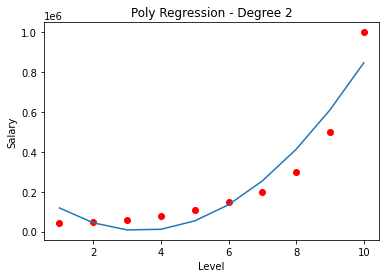

In [57]:
# Step 7 - Visualize Poly Regression Results
plt.scatter(X,Y, color="red")
plt.plot(X, lin_reg_2.predict(X_poly))
plt.title("Poly Regression - Degree 2")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

In [59]:
# Importing the required module
from sklearn.metrics import r2_score
# Evaluating model performance
print('R-square score is :', r2_score(Y, lin_reg_2.predict(X_poly)))

R-square score is : 0.9162082221443943


In [64]:
lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))

array([[189498.10606061]])

In [65]:
poly_reg = PolynomialFeatures(degree=3)
X_poly_3 = poly_reg.fit_transform(X)

In [66]:
#Fitting Polynomial Regression
lin_reg_3 = LinearRegression()
lin_reg_3.fit(X_poly_3,Y)

LinearRegression()

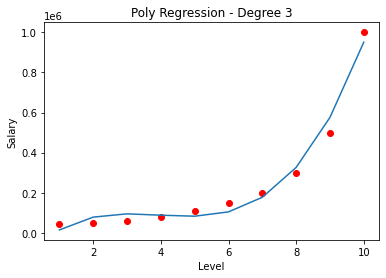

In [67]:
# Step 7 - Visualize Poly Regression Results
plt.scatter(X,Y, color="red")
plt.plot(X, lin_reg_3.predict(X_poly_3))
plt.title("Poly Regression - Degree 3")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

In [68]:
print('R-square score is :', r2_score(Y, lin_reg_3.predict(X_poly_3)))

R-square score is : 0.9812097727913366


In [71]:
lin_reg_3.predict(poly_reg.fit_transform([[6.5]]))

array([[133259.46969697]])

In [72]:
poly_reg = PolynomialFeatures(degree=4)
X_poly_4 = poly_reg.fit_transform(X)

In [73]:
#Fitting Polynomial Regression
lin_reg_4 = LinearRegression()
lin_reg_4.fit(X_poly_4,Y)

LinearRegression()

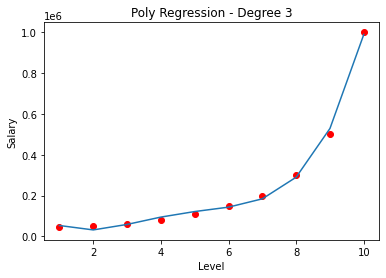

In [74]:
# Step 7 - Visualize Poly Regression Results
plt.scatter(X,Y, color="red")
plt.plot(X, lin_reg_4.predict(X_poly_4))
plt.title("Poly Regression - Degree 3")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

In [75]:
print('R-square score is :', r2_score(Y, lin_reg_4.predict(X_poly_4)))

R-square score is : 0.9973922891706614


In [76]:
lin_reg_4.predict(poly_reg.fit_transform([[6.5]]))

array([[158862.45265153]])

the best degree is 4. 

Multivariate polynomial regression is used to model complex relationships with multiple variables. These complex relationships are usually non-linear and high in dimensions. Once an accurate equation (model) is created or found, this equation can be used for future accurate predictions.

# Coding a polynomial regression model with multiple features

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
np.random.seed(1)
x_1 = np.absolute(np.random.randn(100, 1) * 10)
x_2 = np.absolute(np.random.randn(100, 1) * 30)
x_3 = np.absolute(np.random.randn(100, 1) * 20)
x_4 = np.absolute(np.random.randn(100, 1) * 35)
x_5 = np.absolute(np.random.randn(100, 1) * 40)
y = 2*x_1**2 + 3*x_1 + 2 + np.random.randn(100, 1)*20

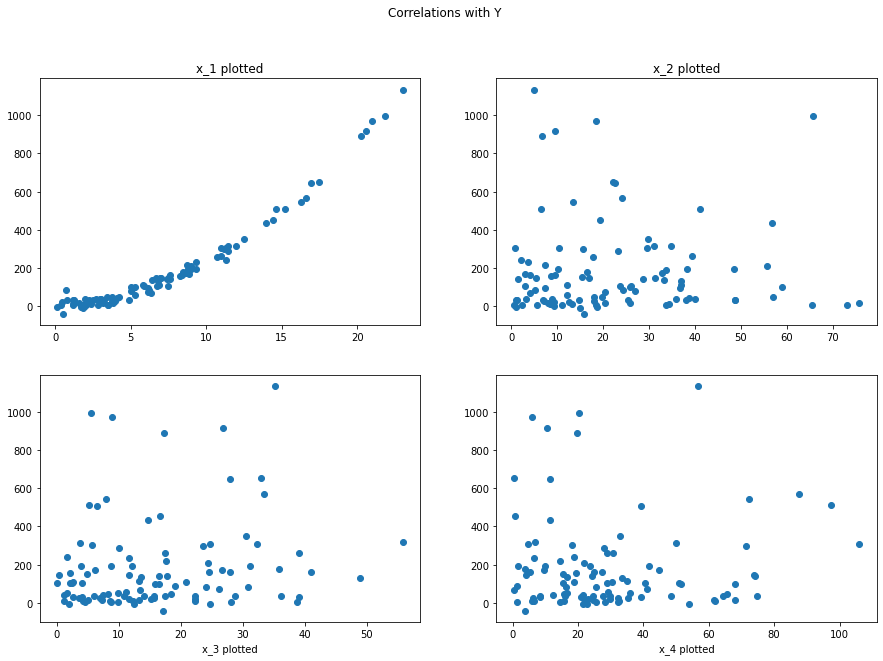

In [48]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes[0,0].scatter(x_1, y)
axes[0,1].scatter(x_2, y)
axes[1,0].scatter(x_3, y)
axes[1,1].scatter(x_4, y)
axes[0,0].set_title("x_1 plotted")
axes[0,1].set_title("x_2 plotted")
axes[1,0].set_xlabel("x_3 plotted")
axes[1,1].set_xlabel("x_4 plotted")
#plt.title('All correlations with y')
plt.suptitle('Correlations with Y')
plt.show()

In [14]:
x_1.shape

(100, 1)

In [17]:
df = pd.DataFrame({"x_1":x_1.reshape(100,), "x_2":x_2.reshape(100,), "x_3":x_3.reshape(100,),"x_4":x_4.reshape(100,), "y":y.reshape(100,)}, index=range(0,100))
df

,x_1,x_2,x_3,x_4,y
0,16.243454,13.413857,8.017564,72.302416,544.042044
1,6.117564,36.735231,16.480112,51.490492,96.344294
2,5.281718,12.104749,11.246109,29.056016,57.647283
3,10.729686,17.807356,39.097562,30.820216,258.609500
4,8.654076,32.847355,26.639033,9.768420,172.568645
...,...,...,...,...,...
95,0.773401,48.823150,5.947238,27.808488,34.594851
96,3.438537,18.069578,8.346040,65.560634,49.196302
97,0.435969,12.608466,15.695413,32.221529,23.415086
98,6.200008,24.328550,19.108505,1.237877,88.157137


Again, reshape(100,) is needed (100, because we have 100 rows), otherwise we’d receive the following error:

data must be 1-dimensional polynomial regression

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X, y = df[["x_1", "x_2","x_3","x_4"]], df["y"]

In [21]:
from sklearn.preprocessing import PolynomialFeatures

In [22]:
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(X)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)

poly_features = poly.fit_transform(X): just as before, we create the new polynomial features.

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train, y_train)

LinearRegression()

In [27]:
poly_reg_y_predicted = poly_reg_model.predict(X_test)

In [30]:
# Importing the required module
from sklearn.metrics import r2_score
# Evaluating model performance
print('R-square score is :', r2_score(y_test, poly_reg_y_predicted))

R-square score is : 0.9814580661140021


In [32]:
import numpy as np

In [34]:
from sklearn.metrics import mean_squared_error
print('RMSE :', np.sqrt(mean_squared_error(y_test, poly_reg_y_predicted)))

RMSE : 21.509664976988358


Creating a linear regression model on the same data. 

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)
lin_reg_y_predicted = lin_reg_model.predict(X_test)

In [36]:
print('R-square score is :', r2_score(y_test, lin_reg_y_predicted ))

R-square score is : 0.8015970761682829


the polinomial gives an score of 98% whereas the lineal regression gives a score of 80%

In [37]:
print('RMSE :', np.sqrt(mean_squared_error(y_test, lin_reg_y_predicted )))

RMSE : 70.36070235070699


RMSE the lower the better: the polinomial gives a RMSE of 21.5 whereas the lineal regression gives a RMSE of 70

In [305]:
df = pd.read_csv('C:/Users/Admin/Machine Learning chapter 5/Fish_data_set.csv')
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [306]:
df1 = df.rename(columns={'Length1':'VerticalLen','Length2':'DiagonalLen','Length3':'CrossLen'})
df1.sample(5) # Display random 5 records

,Species,Weight,VerticalLen,DiagonalLen,CrossLen,Height,Width
148,Smelt,9.7,10.4,11.0,12.0,2.1960,1.3800
97,Perch,145.0,22.0,24.0,25.5,6.3750,3.8250
75,Perch,51.5,15.0,16.2,17.2,4.5924,2.6316
136,Pike,540.0,40.1,43.0,45.8,7.7860,5.1296
55,Whitefish,270.0,23.6,26.0,28.7,8.3804,4.2476


In [187]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Species      159 non-null    object 
 1   Weight       159 non-null    float64
 2   VerticalLen  159 non-null    float64
 3   DiagonalLen  159 non-null    float64
 4   CrossLen     159 non-null    float64
 5   Height       159 non-null    float64
 6   Width        159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [188]:
df1.corr()

,Weight,VerticalLen,DiagonalLen,CrossLen,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
VerticalLen,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
DiagonalLen,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
CrossLen,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


In [189]:
import seaborn as sns

Text(0.5, 1.0, 'Correlation Matrix')

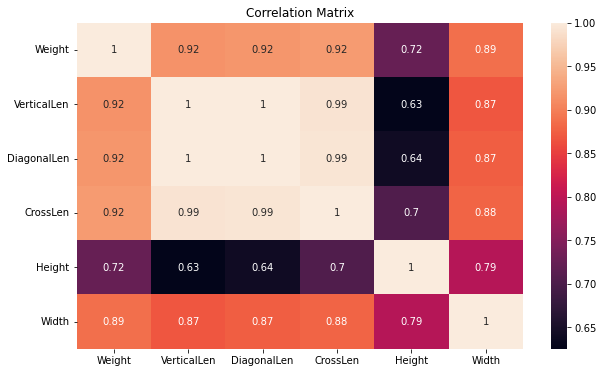

In [190]:
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
sns.heatmap(df1.corr(), annot =True)
plt.title('Correlation Matrix')

In [307]:
df2 = df1.drop(['VerticalLen', 'DiagonalLen', 'CrossLen'], axis =1) # Can also use axis = 'columns'
print('New dimension of dataset is= ', df2.shape)
df2.head(3)

New dimension of dataset is=  (159, 4)


,Species,Weight,Height,Width
0,Bream,242.0,11.5200,4.0200
1,Bream,290.0,12.4800,4.3056
2,Bream,340.0,12.3778,4.6961


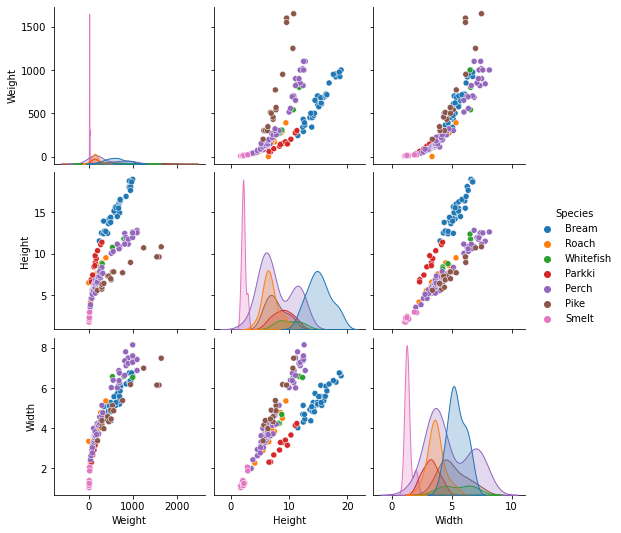

In [193]:
sns.pairplot(df2, kind = 'scatter', hue = 'Species')

Text(0.5, 1.0, 'Outlier Detection Based on Weight')

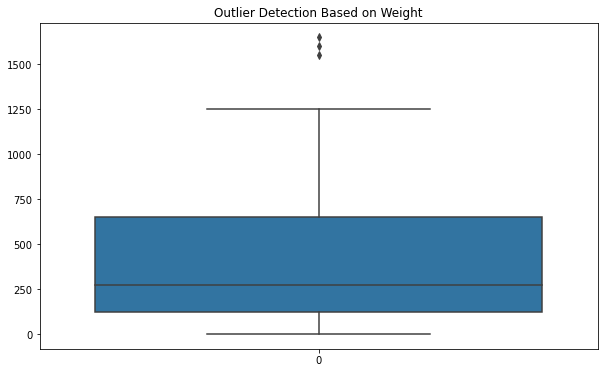

In [194]:
sns.boxplot(data= df2['Weight'] )
plt.title('Outlier Detection Based on Weight')

In [205]:
df2

,Species,Weight,Height,Width
0,Bream,242.0,11.5200,4.0200
1,Bream,290.0,12.4800,4.3056
2,Bream,340.0,12.3778,4.6961
3,Bream,363.0,12.7300,4.4555
4,Bream,430.0,12.4440,5.1340
...,...,...,...,...
154,Smelt,12.2,2.0904,1.3936
155,Smelt,13.4,2.4300,1.2690
156,Smelt,12.2,2.2770,1.2558
157,Smelt,19.7,2.8728,2.0672


In [206]:
df2.columns[1:]

Index(['Weight', 'Height', 'Width'], dtype='object')

In [227]:
def outlier_detection(dataframe):
 
    Q1 = dataframe.quantile(0.25)
    Q3 = dataframe.quantile(0.75)
    IQR = Q3 - Q1
    upper_end = Q3 + 1.5 * IQR
    lower_end = Q1 - 1.5 * IQR 
    outlier = dataframe[(dataframe > upper_end) | (dataframe < lower_end)]
    return outlier

In [228]:
df2['Weight'].quantile(0.75)

650.0

In [229]:
for column in df2.columns[1:]: 
    print('\nOutliers in column "%s" ' % column)
    outlier = outlier_detection(df2[column])
    print(outlier)


Outliers in column "Weight" 
142    1600.0
143    1550.0
144    1650.0
Name: Weight, dtype: float64

Outliers in column "Height" 
Series([], Name: Height, dtype: float64)

Outliers in column "Width" 
Series([], Name: Width, dtype: float64)


-For features Weight index number 142, 143 and 144 are the outliers.
-For features Height and Width there are no outliers
-Important thing to note is, we haven't consider the individual fish species count and physical properties while finding the outliers.For e.g. Pike are bigger and Smelt are smaller fish species.

In [232]:
df2['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [230]:
df2.head(3)

,Species,Weight,Height,Width
0,Bream,242.0,11.5200,4.0200
1,Bream,290.0,12.4800,4.3056
2,Bream,340.0,12.3778,4.6961


Text(0.5, 1.0, 'Outlier Detection For Perch Species')

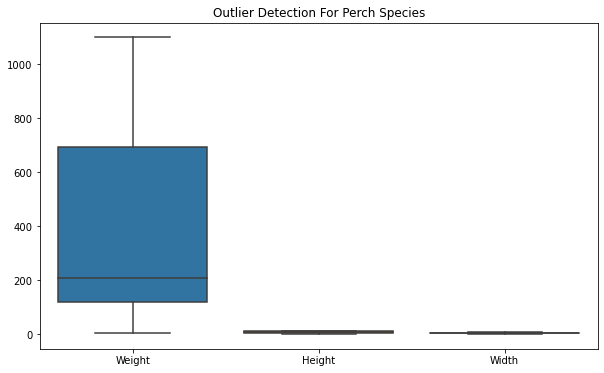

In [233]:
#No outliers found. 
sns.boxplot(data= df2[df2.Species == 'Perch'] )
plt.title('Outlier Detection For Perch Species')

Text(0.5, 1.0, 'Outlier Detection For Perch Species')

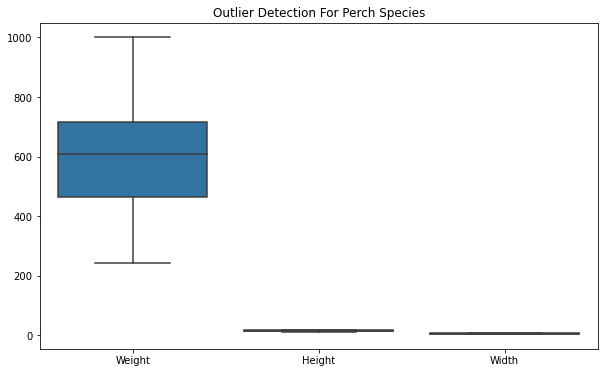

In [234]:
#No outliers found. 
sns.boxplot(data= df2[df2.Species == 'Bream'] )
plt.title('Outlier Detection For Perch Species')

Text(0.5, 1.0, 'Outlier Detection For Perch Species')

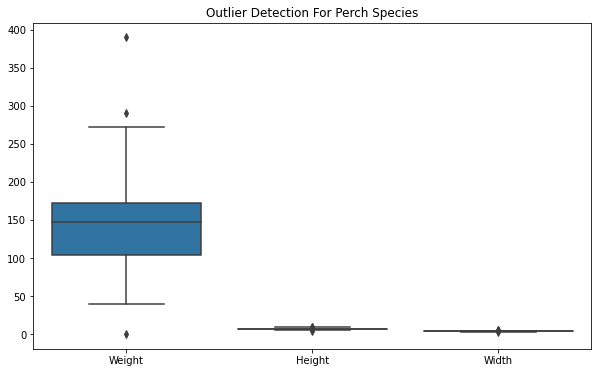

In [235]:
#No outliers found. 
sns.boxplot(data= df2[df2.Species == 'Roach'] )
plt.title('Outlier Detection For Perch Species')

In [236]:
df_Roach = df2[df2.Species == 'Roach']
for column in df_Roach.columns[1:]: 
    print('\nOutliers in column "%s" ' % column)
    outlier = outlier_detection(df_Roach[column])
    print(outlier)


Outliers in column "Weight" 
40      0.0
52    290.0
54    390.0
Name: Weight, dtype: float64

Outliers in column "Height" 
35    4.1472
52    8.8768
54    9.4850
Name: Height, dtype: float64

Outliers in column "Width" 
35    2.2680
53    4.7736
54    5.3550
Name: Width, dtype: float64


Text(0.5, 1.0, 'Outlier Detection For Pike Species')

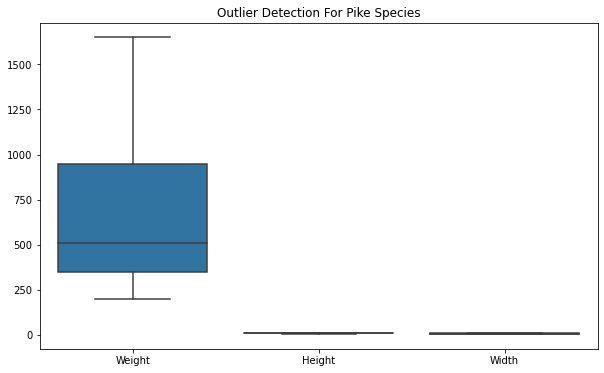

In [238]:
#no outlier detection. 
sns.boxplot(data= df2[df2.Species == 'Pike'] )
plt.title('Outlier Detection For Pike Species')

Text(0.5, 1.0, 'Outlier Detection For Smelt Species')

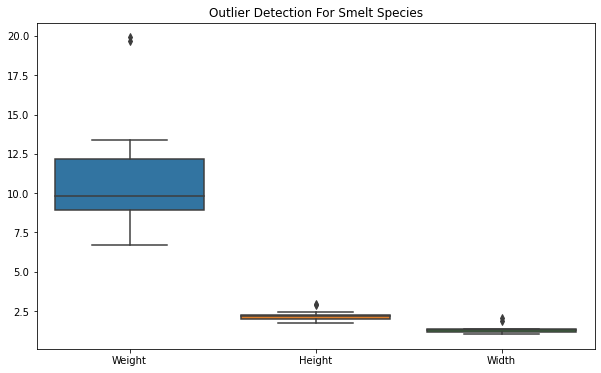

In [240]:
sns.boxplot(data= df2[df2.Species == 'Smelt'] )
plt.title('Outlier Detection For Smelt Species')

In [241]:
df_Smelt = df2[df2.Species == 'Smelt']
for column in df_Smelt.columns[1:]: 
    print('\nOutliers in column "%s" ' % column)
    outlier = outlier_detection(df_Smelt[column])
    print(outlier)


Outliers in column "Weight" 
157    19.7
158    19.9
Name: Weight, dtype: float64

Outliers in column "Height" 
157    2.8728
158    2.9322
Name: Height, dtype: float64

Outliers in column "Width" 
157    2.0672
158    1.8792
Name: Width, dtype: float64


Text(0.5, 1.0, 'Outlier Detection For Parkki Species')

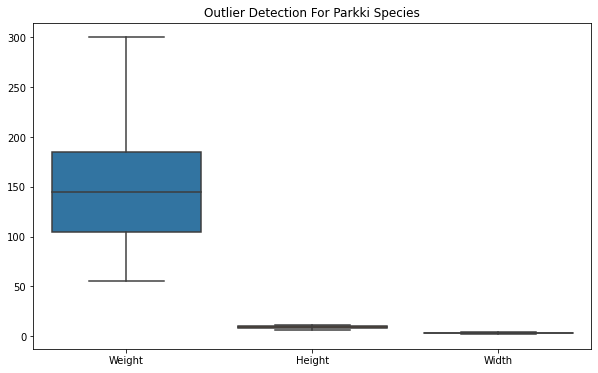

In [242]:
sns.boxplot(data= df2[df2.Species == 'Parkki'] )
plt.title('Outlier Detection For Parkki Species')

In [245]:
#no outliers
df_Smelt = df2[df2.Species == 'Parkki']
for column in df_Smelt.columns[1:]: 
    print('\nOutliers in column "%s" ' % column)
    outlier = outlier_detection(df_Smelt[column])
    print(outlier)


Outliers in column "Weight" 
Series([], Name: Weight, dtype: float64)

Outliers in column "Height" 
Series([], Name: Height, dtype: float64)

Outliers in column "Width" 
Series([], Name: Width, dtype: float64)


Text(0.5, 1.0, 'Outlier Detection For Whitefish Species')

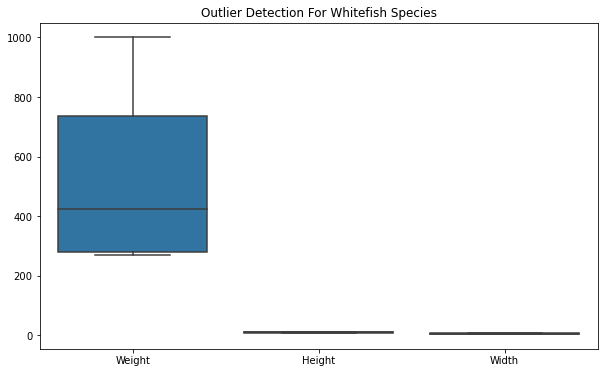

In [247]:
sns.boxplot(data= df2[df2.Species == 'Whitefish'] )
plt.title('Outlier Detection For Whitefish Species')

In [248]:
#no outliers
df_Smelt = df2[df2.Species == 'Whitefish']
for column in df_Smelt.columns[1:]: 
    print('\nOutliers in column "%s" ' % column)
    outlier = outlier_detection(df_Smelt[column])
    print(outlier)


Outliers in column "Weight" 
Series([], Name: Weight, dtype: float64)

Outliers in column "Height" 
Series([], Name: Height, dtype: float64)

Outliers in column "Width" 
Series([], Name: Width, dtype: float64)


Dropping the outlier rows
If we don't consider species specific measurement then outlier are 142, 143 and 144
And as per species specific measurement outliers are 35,40,52,53,54,157,158.

In [308]:
#drop rows with outliers. 
df3 = df2.drop([35,40,52,53,54,157,158])
df3.shape

(152, 4)

In [309]:
df3.isna().sum()

Species    0
Weight     0
Height     0
Width      0
dtype: int64

In [310]:
df3[df3.Weight <= 0]

,Species,Weight,Height,Width


One Hot Encoding
Since Species is categorical value, we are going to use One Hot Encoding to convert it into numerical format.

In [311]:
dummies_species = pd.get_dummies(df3.Species) # store the dummy variables in 'dummies_species' dataframe
dummies_species.head(100)

,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
100,0,0,1,0,0,0,0
101,0,0,1,0,0,0,0
102,0,0,1,0,0,0,0
103,0,0,1,0,0,0,0


1 = true
0 = false

In [312]:
df5 = pd.concat([df2, dummies_species],axis = 'columns')
df5.head(3)

,Species,Weight,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,Bream,242.0,11.5200,4.0200,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Bream,290.0,12.4800,4.3056,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Bream,340.0,12.3778,4.6961,1.0,0.0,0.0,0.0,0.0,0.0,0.0


-with whitefish there are only 6 rows. 
Since we have dummy variables we can drop the 'Species' column.

In [313]:
df6 = df5.drop(['Species','Whitefish'], axis = 'columns')
df6.head(3)

,Weight,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt
0,242.0,11.5200,4.0200,1.0,0.0,0.0,0.0,0.0,0.0
1,290.0,12.4800,4.3056,1.0,0.0,0.0,0.0,0.0,0.0
2,340.0,12.3778,4.6961,1.0,0.0,0.0,0.0,0.0,0.0


Build a machibe learning model. 

In [314]:
X = df6[['Height', 'Width', 'Bream', 'Parkki' ,'Perch', 'Pike', 'Roach', 'Smelt']] # Or can use df6.iloc[:,[1,2,3,4,5,6,7,8]]
y = df6[['Weight']]

In [315]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)
print('X_train dimension= ', X_train.shape)
print('X_test dimension= ', X_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_train dimension= ', y_test.shape)

X_train dimension=  (127, 8)
X_test dimension=  (32, 8)
y_train dimension=  (127, 1)
y_train dimension=  (32, 1)


In [261]:
import numpy as np

In [275]:
def polynomial_plot(feature, label):
  # Create 1D array. We can use 'squeeze' function to reduce the 2D array to 1D array
    x_coordinates = feature
    y_coordinates = np.squeeze(label)

 # Contruct first degree polynomial function
    linear_func = np.poly1d(np.polyfit(x_coordinates, y_coordinates, 1))
  # Contruct second degree polynomial function
    quadratic_func = np.poly1d(np.polyfit(x_coordinates, y_coordinates, 2))
  # Contruct third degree polynomial function
    cubic_func = np.poly1d(np.polyfit(x_coordinates, y_coordinates, 3))
  # Generate evenly spaced values
    values = np.linspace(x_coordinates.min(), x_coordinates.max(), len(x_coordinates))

    plt.scatter(x_coordinates,y_coordinates, color='blue')  
    plt.plot(values,linear_func(values), color='cyan', linestyle='dashed', label='Linear Function')
    plt.plot(values,quadratic_func(values), color='orange', label='Quadratic Function')
    plt.plot(values,cubic_func(values), color='red', label='Cubic Function')
    plt.xlabel('%s From Train Data'%(feature.name))
    plt.ylabel('Weight')
    plt.rcParams["figure.figsize"] = (15,8) # Custom figure size in inches
    plt.legend()
    plt.title("Linear Vs Quadratic Function For Feature %s" % (feature.name))
    plt.show()

In [276]:
X_train

,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt
94,5.2185,3.6260,0.0,0.0,1.0,0.0,0.0,0.0
29,18.9570,6.6030,1.0,0.0,0.0,0.0,0.0,0.0
81,5.0820,2.7720,0.0,0.0,1.0,0.0,0.0,0.0
113,10.6091,6.7408,0.0,0.0,1.0,0.0,0.0,0.0
117,11.1366,6.0030,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
37,5.5756,2.9044,0.0,0.0,0.0,0.0,1.0,0.0
66,8.5376,3.2944,0.0,1.0,0.0,0.0,0.0,0.0
115,10.5717,6.3666,0.0,0.0,1.0,0.0,0.0,0.0
119,11.9286,7.1064,0.0,0.0,1.0,0.0,0.0,0.0


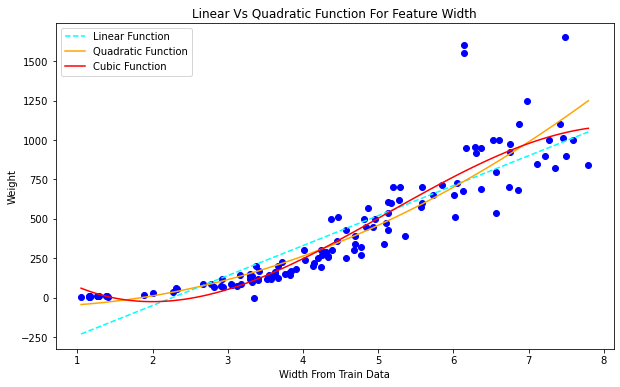

In [277]:
polynomial_plot(X_train.Width, y_train)

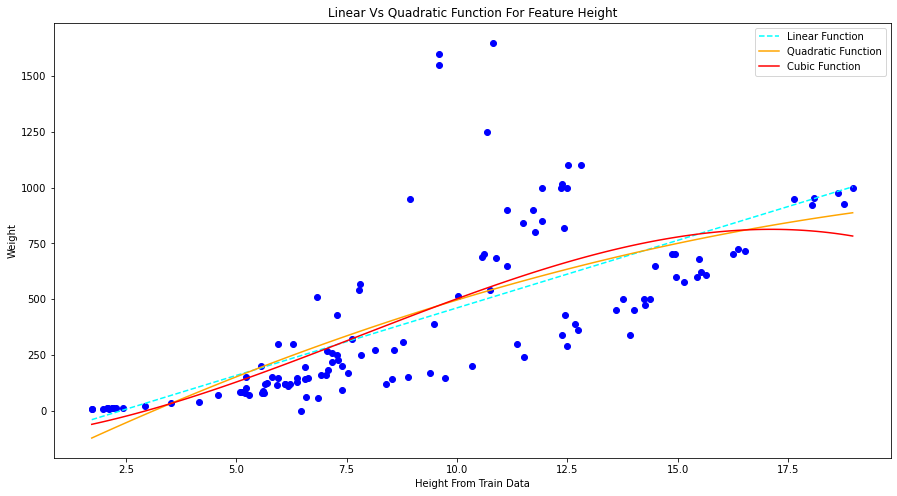

In [286]:
polynomial_plot(X_train['Height'], y_train)

# We can see that Width is more correlated to Weight than Height vs Weight. 

Using sklearn

In [288]:
from sklearn.preprocessing import PolynomialFeatures

In [316]:
X_train.isnull().sum()

Height    0
Width     0
Bream     7
Parkki    7
Perch     7
Pike      7
Roach     7
Smelt     7
dtype: int64

In [318]:
X_train['Bream'].value_counts()

0.0    95
1.0    25
Name: Bream, dtype: int64

In [319]:
X_train = X_train.fillna(1)

In [320]:
y_train = y_train.fillna(y_train.mean())

In [371]:
poly = PolynomialFeatures(degree = 2) 
X_poly = poly.fit_transform(X_train) 
poly.fit(X_poly, y_train) 

PolynomialFeatures()

In [372]:
from sklearn.linear_model import LinearRegression

In [373]:
lm =LinearRegression() 
lm.fit(X_poly, y_train) 

LinearRegression()

In [374]:
#this score is fore the second degree polinomial. 
predictions = lm.predict(poly.fit_transform(X_test))
print('r2_score= ',r2_score(y_test, predictions))

r2_score=  0.9667909043271276


In [364]:
poly = PolynomialFeatures(degree = 3) 
X_poly_3 = poly.fit_transform(X_train) 
poly.fit(X_poly_3, y_train) 

PolynomialFeatures(degree=3)

In [365]:
lm3 =LinearRegression() 
lm3.fit(X_poly_3, y_train) 

LinearRegression()

In [367]:
#this score is fore the third degree polinomial. 
predictions = lm3.predict(poly.fit_transform(X_test))
print('r2_score= ',r2_score(y_test, predictions))

r2_score=  0.7850950774326529


In [368]:
poly = PolynomialFeatures(degree = 4) 
X_poly_4 = poly.fit_transform(X_train) 
poly.fit(X_poly_4, y_train) 

PolynomialFeatures(degree=4)

In [369]:
lm4 =LinearRegression() 
lm4.fit(X_poly_4, y_train) 

LinearRegression()

In [370]:
#this score is fore the fourth degree polinomial. The worst score even negative. 
predictions = lm4.predict(poly.fit_transform(X_test))
print('r2_score= ',r2_score(y_test, predictions))

r2_score=  -1044162993.4502563


# The best score was given by the polinomial of 3rd degree r2_score=  0.9667909043271276

# Multiple Regression Models Fish Weight Prediction

In [359]:
df5

,Species,Weight,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,Bream,242.0,11.5200,4.0200,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Bream,290.0,12.4800,4.3056,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Bream,340.0,12.3778,4.6961,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bream,363.0,12.7300,4.4555,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Bream,430.0,12.4440,5.1340,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
154,Smelt,12.2,2.0904,1.3936,0.0,0.0,0.0,0.0,0.0,1.0,0.0
155,Smelt,13.4,2.4300,1.2690,0.0,0.0,0.0,0.0,0.0,1.0,0.0
156,Smelt,12.2,2.2770,1.2558,0.0,0.0,0.0,0.0,0.0,1.0,0.0
157,Smelt,19.7,2.8728,2.0672,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [360]:
#X = df3.iloc[:,[2,3]] # Select columns using column index
X = df3[['Height','Width']] # Select columns using column name
X.head()

,Height,Width
0,11.5200,4.0200
1,12.4800,4.3056
2,12.3778,4.6961
3,12.7300,4.4555
4,12.4440,5.1340


In [361]:
#y = df3.iloc[:,[1]] # Select columns using column index
y = df3[['Weight']]
y.head(5)

,Weight
0,242.0
1,290.0
2,340.0
3,363.0
4,430.0


In [375]:
#Create test and train dataset
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state = 42) 
# Use paramter 'random_state=1' if you want keep results same everytime you execute above code
print('X_train dimension= ', X_train.shape)
print('X_test dimension= ', X_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_train dimension= ', y_test.shape)

X_train dimension=  (121, 2)
X_test dimension=  (31, 2)
y_train dimension=  (121, 1)
y_train dimension=  (31, 1)


In [377]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [378]:
#there are tow coeffidients because here are two X independent variables. 
print('coef= ', model.coef_) # Since we have two features(Height and Width), there will be 2 coef
print('intercept= ', model.intercept_)
print('score= ', model.score(X_test,y_test))

coef=  [[  8.96710955 163.26483923]]
intercept=  [-414.8820092]
score=  0.699909925109458


The best score was the second degree polinomial. 

In [379]:
predictedWeight = pd.DataFrame(model.predict(X_test), columns=['Predicted Weight']) # Create new dataframe of column'Predicted Weight'
actualWeight = pd.DataFrame(y_test)
actualWeight = actualWeight.reset_index(drop=True) # Drop the index so that we can concat it, to create new dataframe
df_actual_vs_predicted = pd.concat([actualWeight,predictedWeight],axis =1)
df_actual_vs_predicted

,Weight,Predicted Weight
0,32.0,-56.846980
1,9.9,-204.679249
2,218.0,325.963726
3,120.0,211.201047
4,950.0,672.700180
5,1650.0,903.291377
6,720.0,726.118915
7,500.0,421.639062
8,610.0,563.469846
9,600.0,634.570031


Text(0.5, 1.0, 'Weight From test Data Vs Weight Predicted By Model')

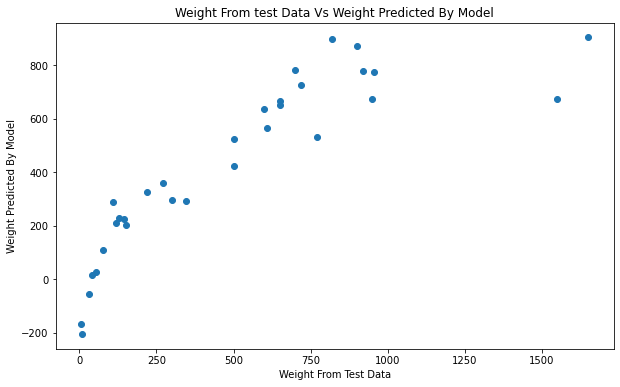

In [380]:
plt.scatter(y_test, model.predict(X_test))
plt.xlabel('Weight From Test Data')
plt.ylabel('Weight Predicted By Model')
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title("Weight From test Data Vs Weight Predicted By Model")

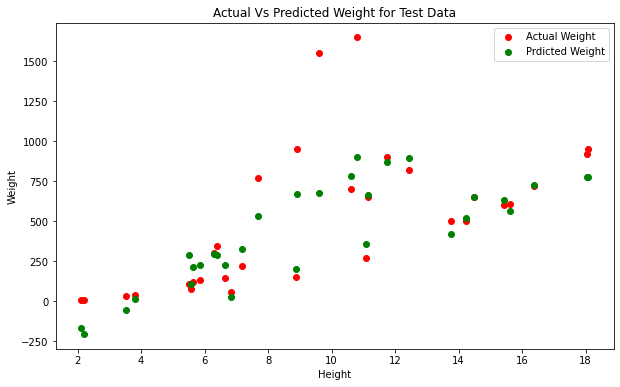

In [381]:
plt.scatter(X_test['Height'], y_test, color='red', label = 'Actual Weight')
plt.scatter(X_test['Height'], model.predict(X_test), color='green', label = 'Prdicted Weight')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title('Actual Vs Predicted Weight for Test Data')
plt.legend()
plt.show()

In [382]:
#it is not as good as the second degree polinomial but it is still good. 
df_actual_vs_predicted['Weight'].corr(df_actual_vs_predicted['Predicted Weight'])

0.8628226692422537

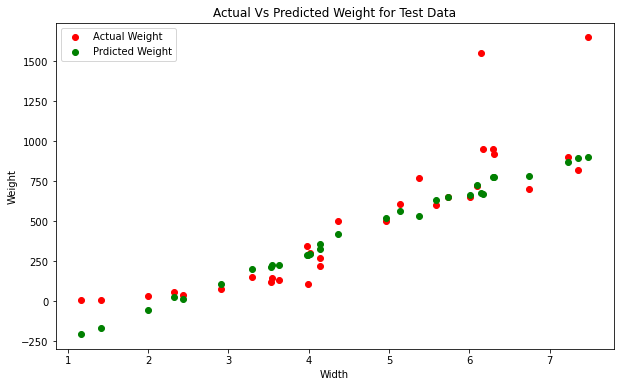

In [383]:
plt.scatter(X_test['Width'], y_test, color='red', label = 'Actual Weight')
plt.scatter(X_test['Width'], model.predict(X_test), color='green', label = 'Prdicted Weight')
plt.xlabel('Width')
plt.ylabel('Weight')
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title('Actual Vs Predicted Weight for Test Data')
plt.legend()
plt.show()

# for this model we use to independent variables Height and Width to predict the Weight, dependent variable. 

Please note that for the above example the example continues at the end of this notebook with the Ridge regression

In [1]:
from sklearn.preprocessing import PolynomialFeatures

In [2]:
from sklearn.linear_model import LinearRegression

In [3]:
from sklearn.pipeline import make_pipeline

In [4]:
import numpy as np

In [17]:
def PolynomialRegression(degree=2,**kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                          LinearRegression(**kwargs))

In [18]:
def make_data(N,err=1.0,rseed=10):
    rng= np.random.RandomState(rseed)
    X = rng.rand(N,1)**2
    y = 10 -1./(X.ravel() +0.1)
    if err > 0: 
        y += err * rng.randn(N)
    return X,y

In [19]:
X,y = make_data(40)

In [20]:
X.shape, y.shape

((40, 1), (40,))

In [21]:
import matplotlib.pyplot as plt

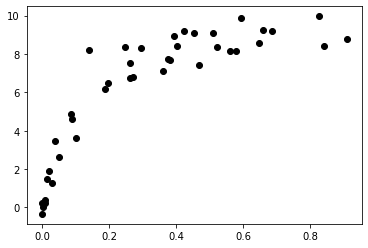

In [22]:
plt.scatter(X,y,color='black')

In [23]:
X_test = np.linspace(-0.1,1.1,500)[:,None]

In [24]:
X_test.shape

(500, 1)

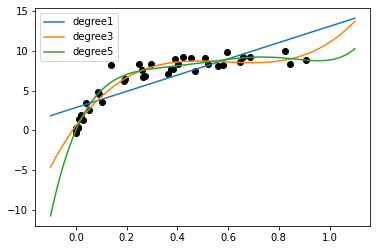

In [25]:
plt.scatter(X,y,color='black')
axis = plt.axis()
for degree in [1,3,5]:
    y_test = PolynomialRegression(degree).fit(X,y).predict(X_test)
    plt.plot(X_test,y_test,label='degree{0}'.format(degree))
plt.legend(loc='best');

# Grid example to use the optimal polynomial model using the best degree number:

In [28]:
from sklearn.model_selection import GridSearchCV

In [31]:
param_grid = {'polynomialfeatures__degree':np.arange(21),
             'linearregression__fit_intercept':[True,False]}

In [32]:
grid = GridSearchCV(PolynomialRegression(),param_grid)

In [33]:
grid.fit(X,y)

GridSearchCV(estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'linearregression__fit_intercept': [True, False],
                         'polynomialfeatures__degree': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])})

In [34]:
#2 is the best degree for this polinomial regression model. 
grid.best_params_

{'linearregression__fit_intercept': True, 'polynomialfeatures__degree': 2}

# Second Degree is the best degree for this polinomial regression model.¶

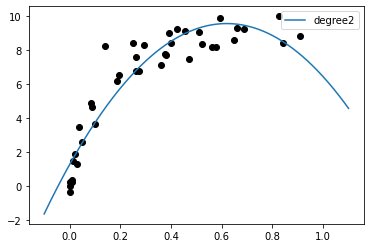

In [35]:
plt.scatter(X,y,color='black')
axis = plt.axis()
y_test = PolynomialRegression(2).fit(X,y).predict(X_test)
plt.plot(X_test,y_test,label='degree2')
plt.legend(loc='best');

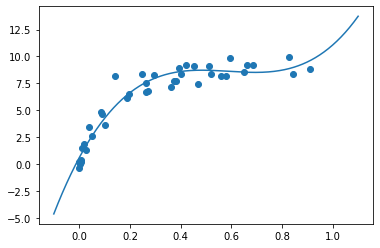

In [36]:
#Check the third degree model:
plt.scatter(X,y)
y_test = PolynomialRegression(3).fit(X,y).predict(X_test)
plt.plot(X_test,y_test);

# Another example: 

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [39]:
dataset = pd.read_csv('C:/Users/Admin/Machine Learning 1/SchoolSalariesFinal.csv')
dataset

,School Name,Unnamed: 1,School Type,Starting Median Salary
0,Massachusetts Institute of Technology (MIT),1,Engineering,72200
1,California Institute of Technology (CIT),2,Engineering,75500
2,Harvey Mudd College,3,Engineering,71800
3,"Polytechnic University of New York, Brooklyn",4,Engineering,62400
4,Cooper Union,5,Engineering,62200
...,...,...,...,...
264,Austin Peay State University,265,State,37700
265,Pittsburg State University,266,State,40400
266,Southern Utah University,267,State,41900
267,Montana State University - Billings,268,State,37900


In [40]:
datasetfinal = dataset[dataset['Unnamed: 1'] > 80]
datasetfinal

,School Name,Unnamed: 1,School Type,Starting Median Salary
80,Skidmore College,81,Liberal Arts,41600
81,Moravian College,82,Liberal Arts,42500
82,Lewis & Clark College,83,Liberal Arts,38900
83,Fort Lewis College,84,Liberal Arts,42000
84,Thomas Aquinas College,85,Liberal Arts,41500
...,...,...,...,...
264,Austin Peay State University,265,State,37700
265,Pittsburg State University,266,State,40400
266,Southern Utah University,267,State,41900
267,Montana State University - Billings,268,State,37900


In [52]:
X = datasetfinal.iloc[:,1].values[:,None]  
y = datasetfinal.iloc[:,3].values

In [53]:
X.shape, y.shape

((189, 1), (189,))

In [54]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression()

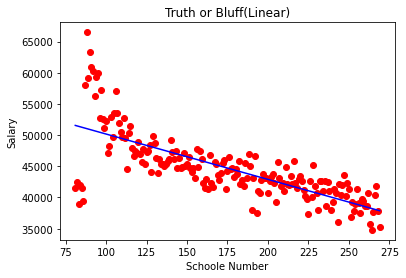

In [55]:
plt.scatter(X,y, color='red')
plt.plot(X, lin_reg.predict(X),color='blue')
plt.title("Truth or Bluff(Linear)")
plt.xlabel('Schoole Number')
plt.ylabel('Salary')
plt.show()

# Linear regression is not a good option for this case. 

In [64]:
param_grid = {'polynomialfeatures__degree':np.arange(21),
             'linearregression__fit_intercept':[True,False]}

In [65]:
grid = GridSearchCV(PolynomialRegression(),param_grid)

In [66]:
grid.fit(X,y)

GridSearchCV(estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'linearregression__fit_intercept': [True, False],
                         'polynomialfeatures__degree': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])})

In [67]:
#2 is the best degree for this polinomial regression model. 
grid.best_params_

{'linearregression__fit_intercept': True, 'polynomialfeatures__degree': 1}

In [56]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)

In [57]:
X_poly.shape

(189, 3)

In [58]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly,y)

LinearRegression()

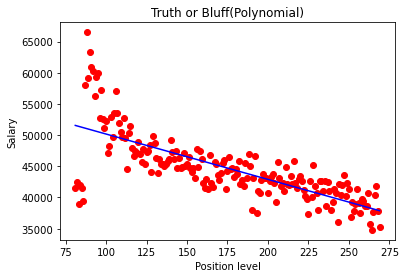

In [68]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=1)
X_poly = poly_reg.fit_transform(X)
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly,y)
 
X_grid = np.arange(min(X),max(X),0.1)
X_grid = X_grid.reshape(len(X_grid),1) 
plt.scatter(X,y, color='red') 
 
plt.plot(X_grid, lin_reg2.predict(poly_reg.fit_transform(X_grid)),color='blue') 
 
plt.title("Truth or Bluff(Polynomial)")
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

# It seems that for this data linear regression is the best model to predict new data. 

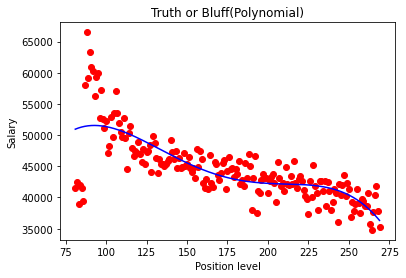

In [71]:
#check visualization of 4th degree
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly,y)
 
X_grid = np.arange(min(X),max(X),0.1)
X_grid = X_grid.reshape(len(X_grid),1) 
plt.scatter(X,y, color='red') 
 
plt.plot(X_grid, lin_reg2.predict(poly_reg.fit_transform(X_grid)),color='blue') 
 
plt.title("Truth or Bluff(Polynomial)")
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [73]:
dataset2 = pd.read_csv('C:/Users/Admin/Machine Learning 1/SalariesExperience.csv')
dataset2

,Years of experience,Salary
0,1,45000
1,2,50000
2,3,60000
3,4,80000
4,5,110000
5,6,150000
6,7,200000
7,8,300000
8,9,500000
9,10,1000000


In [79]:
X = dataset2.iloc[:,0].values
y = dataset2.iloc[:, 1].values

In [83]:
X = X.reshape(-1, 1)

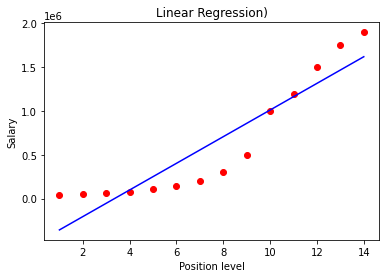

In [88]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Visualizing the Linear Regression results
def viz_linear():
    plt.scatter(X, y, color='red')
    plt.plot(X, lin_reg.predict(X), color='blue')
    plt.title('Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_linear()

In [85]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
model = pol_reg.fit(X_poly, y)

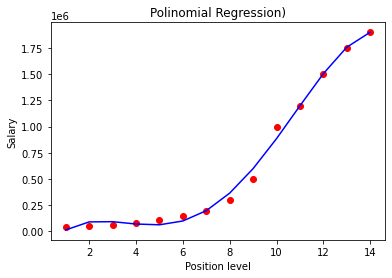

In [87]:
# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(X_poly), color='blue')
    plt.title('Polinomial Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_polymonial()

# ANOTHER EXAMPLE

In [127]:
# creating a dataset with curvilinear relationship
x=10*np.random.normal(0,1,70)#(mean,std,number of values)
y=10*(-x**2)+np.random.normal(-100,100,70)

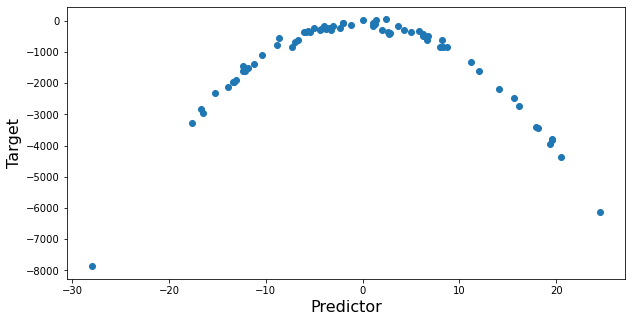

In [128]:
# plotting dataset
plt.figure(figsize=(10,5))
plt.scatter(x,y)
plt.xlabel('Predictor',fontsize=16)
plt.ylabel('Target',fontsize=16)
plt.show()

In [129]:
x = x.reshape(-1,1)

In [130]:
# Importing Linear Regression
from sklearn.linear_model import LinearRegression
# Training Model
lm=LinearRegression()
lm.fit(x,y)

LinearRegression()

In [131]:
y_pred=lm.predict(x)

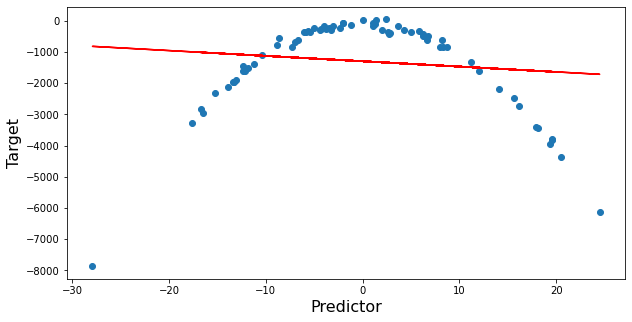

In [132]:
# plotting predictions
plt.figure(figsize=(10,5))
plt.scatter(x,y)
plt.plot(x,y_pred,color='r')
plt.xlabel('Predictor',fontsize=16)
plt.ylabel('Target',fontsize=16)
plt.show()

# Linear regression is a really bad model for predicition in this polinomial form.

In [133]:
# importing libraries for polynomial transform
from sklearn.preprocessing import PolynomialFeatures
# for creating pipeline
from sklearn.pipeline import Pipeline
# creating pipeline and fitting it on data
Input=[('polynomial',PolynomialFeatures(degree=2)),('modal',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(x,y)

Pipeline(steps=[('polynomial', PolynomialFeatures()),
                ('modal', LinearRegression())])

In [134]:
poly_pred=pipe.predict(x)

In [135]:
sorted_zip = sorted(zip(x,poly_pred))
sorted_zip

[(array([-27.93085]), -7905.23155866974),
 (array([-17.6068856]), -3193.5411942119817),
 (array([-16.74195808]), -2895.9354324253927),
 (array([-16.50721266]), -2817.754786797811),
 (array([-15.25680316]), -2419.9520068449638),
 (array([-13.96620425]), -2042.2787717852957),
 (array([-13.42675789]), -1894.326948604544),
 (array([-13.31951667]), -1865.610396510245),
 (array([-13.05726923]), -1796.359562583083),
 (array([-12.36853377]), -1621.0613580996392),
 (array([-12.33120735]), -1611.8329855719796),
 (array([-12.19744397]), -1578.9917770510483),
 (array([-11.82318127]), -1489.0122278729898),
 (array([-11.19115399]), -1343.444908029917),
 (array([-10.44589382]), -1182.1002833525463),
 (array([-8.90555584]), -883.9617366161815),
 (array([-8.61316361]), -832.7466050985898),
 (array([-7.33271604]), -628.6784464897795),
 (array([-7.00398505]), -581.5971621143093),
 (array([-6.65754518]), -534.3272875438186),
 (array([-6.06998398]), -459.66578432420914),
 (array([-5.86523939]), -435.277047

In [136]:
x_poly, poly_pred = zip(*sorted_zip)

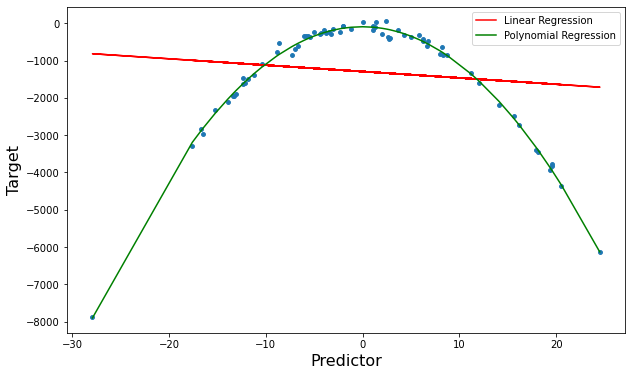

In [137]:
#plotting predictions
plt.figure(figsize=(10,6))
plt.scatter(x,y,s=15)
plt.plot(x,y_pred,color='r',label='Linear Regression')
plt.plot(x_poly,poly_pred,color='g',label='Polynomial Regression')
plt.xlabel('Predictor',fontsize=16)
plt.ylabel('Target',fontsize=16)
plt.legend()
plt.show()

# Another example: 

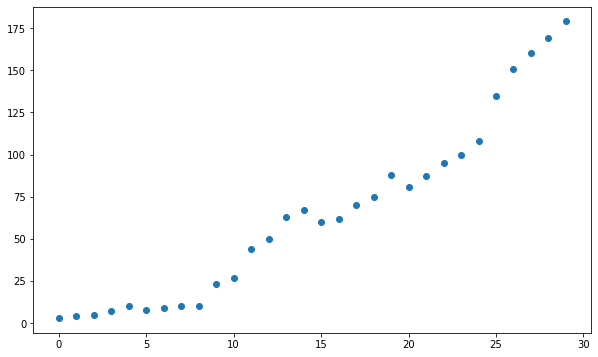

In [138]:
x = np.arange(0, 30)
y = [3, 4, 5, 7, 10, 8, 9, 10, 10, 23, 27, 44, 50, 63, 67, 60, 62, 70, 75, 88, 81, 87, 95, 100, 108, 135, 151, 160, 169, 179]
plt.figure(figsize=(10,6))
plt.scatter(x, y)
plt.show()

In [139]:
from sklearn.preprocessing import PolynomialFeatures

In [140]:
poly = PolynomialFeatures(degree=2, include_bias=False)

In [141]:
poly_features = poly.fit_transform(x.reshape(-1, 1))
poly_features.shape

(30, 2)

In [142]:
#Let’s save an instance of LinearRegression to a variable:
poly_reg_model = LinearRegression()

In [143]:
poly_reg_model.fit(poly_features, y)

LinearRegression()

In [144]:
y_predicted = poly_reg_model.predict(poly_features)

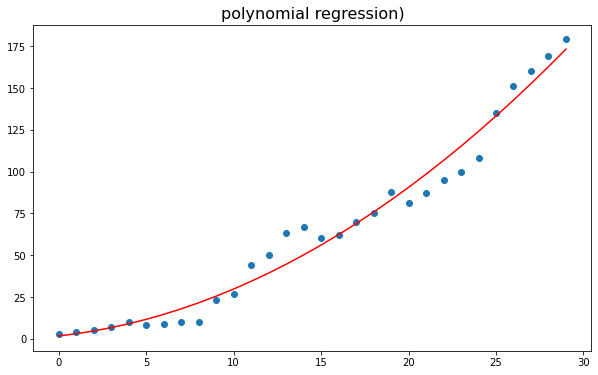

In [145]:
plt.figure(figsize=(10, 6))
plt.title("polynomial regression)", size=16)
plt.scatter(x, y)
plt.plot(x, y_predicted, c="red")
plt.show()

In [146]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
import math

In [147]:
print('MAE',mean_absolute_error(y, y_predicted))
print('MSE',mean_squared_error(y, y_predicted))
print('RMSE',math.sqrt(mean_squared_error(y, y_predicted)))
print('R-square score of Polimomial Regression is :', r2_score(y, y_predicted))

MAE 6.595670851210341
MSE 72.48638275332382
RMSE 8.513893513153887
R-square score of Polimomial Regression is : 0.9742355121173141


# Very good metrics with Polinomial Regression. 

# Multivariable Example

In [112]:
np.random.seed(1)
x_1 = np.absolute(np.random.randn(100, 1) * 10)
x_2 = np.absolute(np.random.randn(100, 1) * 30)
y = 2*x_1**2 + 3*x_1 + 2

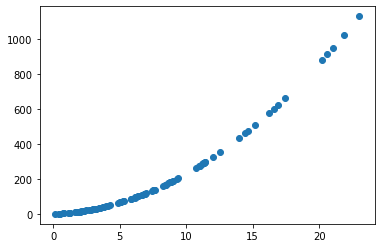

In [113]:
plt.scatter(x_1, y)

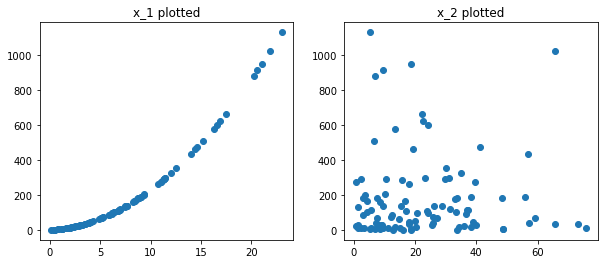

In [114]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
axes[0].scatter(x_1, y)
axes[1].scatter(x_2, y)
axes[0].set_title("x_1 plotted")
axes[1].set_title("x_2 plotted")
plt.show()

In [115]:
#we have to reshape the data in order to have it in a dataframe
df = pd.DataFrame({"x_1":x_1.reshape(100,), "x_2":x_2.reshape(100,), "y":y.reshape(100,)}, index=range(0,100))
df

,x_1,x_2,y
0,16.243454,13.413857,578.429933
1,6.117564,36.735231,95.201874
2,5.281718,12.104749,73.638233
3,10.729686,17.807356,264.441391
4,8.654076,32.847355,177.748302
...,...,...,...
95,0.773401,48.823150,5.516499
96,3.438537,18.069578,35.962680
97,0.435969,12.608466,3.688043
98,6.200008,24.328550,97.480235


In [116]:
X, y = df[["x_1", "x_2"]], df["y"]

In [118]:
from sklearn.model_selection import train_test_split

In [119]:
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(X)#transform to two dimensional data. 
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)

In [120]:
poly_features.shape

(100, 5)

# X_train, X_test, y_train, y_test: train_test_split splits our features (poly_features) and responses (y) into train and test groups – here we just save these groups into variables. The order of the variables is very important, so don’t shuffle them.

In [121]:
#Now let’s create and fit our model, but this time, we’ll train our model only on the training data:
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train, y_train)

LinearRegression()

In [122]:
poly_reg_y_predicted = poly_reg_model.predict(X_test)

In [124]:
print('MAE',mean_absolute_error(y_test, poly_reg_y_predicted))
print('MSE',mean_squared_error(y_test, poly_reg_y_predicted))
print('RMSE',math.sqrt(mean_squared_error(y_test, poly_reg_y_predicted)))
print('R-square score of Polinomial regression is :', r2_score(y_test, poly_reg_y_predicted))

MAE 1.2665424264923785e-13
MSE 2.4351715418356517e-26
RMSE 1.560503618014278e-13
R-square score of Polinomial regression is : 1.0


# Perfect score!

In [125]:
#compare results to linear regression.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [126]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)
lin_reg_y_predicted = lin_reg_model.predict(X_test)

In [148]:
print('MAE',mean_absolute_error(y_test, lin_reg_y_predicted ))
print('MSE',mean_squared_error(y_test, lin_reg_y_predicted ))
print('RMSE',math.sqrt(mean_squared_error(y_test, lin_reg_y_predicted )))
print('R-square score of Linear regression is :', r2_score(y_test, lin_reg_y_predicted ))

MAE 58.736259278342416
MSE 4338.424416144331
RMSE 65.86671705910605
R-square score of Linear regression is : 0.8271587524452948


# Polinomial regression performs better than linear regression. 

--------------------------------------------------------------------------------------------------------------------------------------

# Ridge regression

In [384]:
from sklearn.linear_model import Ridge

In [385]:
from sklearn.model_selection import GridSearchCV
import numpy as np

In [386]:
param_grid = {"alpha": [0.01, 0.05 , 0.1, 0.3, 0.8, 1, 5,10, 15, 30,50,100,200,300,500,700,1000]}

In [387]:
# Initializing Ridge and GridSearchCV estimators
ridge_reg = Ridge()
grid_search = GridSearchCV(estimator=ridge_reg, param_grid=param_grid)

In [388]:
# Fitting grid search object
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.05, 0.1, 0.3, 0.8, 1, 5, 10, 15, 30,
                                   50, 100, 200, 300, 500, 700, 1000]})

In [389]:
grid_search.best_params_ 

{'alpha': 10}

In [390]:
y_predict = grid_search.predict(X_test)

In [391]:
print('R-square score for Ridge regression is :', r2_score(y_test, y_predict))

R-square score for Ridge regression is : 0.6869008520167491


In [393]:
grid_search.score(X_test,y_test)

0.6869008520167491

Text(0.5, 1.0, 'Weight From test Data Vs Weight Predicted By Model Ridge Regression')

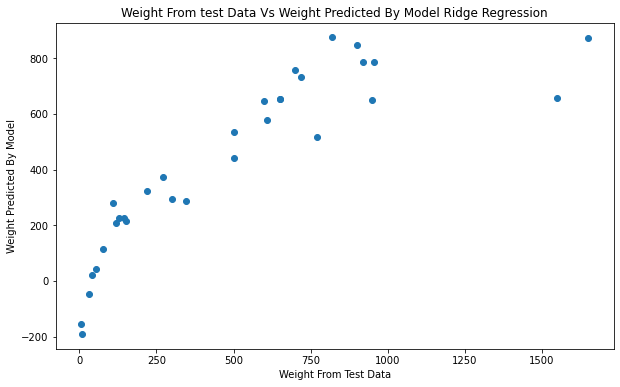

In [394]:
plt.scatter(y_test, grid_search.predict(X_test))
plt.xlabel('Weight From Test Data')
plt.ylabel('Weight Predicted By Model')
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title("Weight From test Data Vs Weight Predicted By Model Ridge Regression")

# Lasso Rgression.

In [396]:
# lasso regression implementation
from sklearn.linear_model import Lasso

In [397]:
param_grid = {"alpha": [0.01, 0.05 , 0.1, 0.3, 0.8, 1, 5,10, 15, 30,50,100,200,300,500,700,1000]}

In [398]:
# Initializing Ridge and GridSearchCV estimators
ridge_reg = Lasso()
grid_search = GridSearchCV(estimator=ridge_reg, param_grid=param_grid)

In [399]:
# Fitting grid search object
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.05, 0.1, 0.3, 0.8, 1, 5, 10, 15, 30,
                                   50, 100, 200, 300, 500, 700, 1000]})

In [400]:
grid_search.best_params_ 

{'alpha': 15}

In [401]:
y_predict = grid_search.predict(X_test)

In [402]:
print('R-square score for Lasso regression is :', r2_score(y_test, y_predict))

R-square score for Ridge regression is : 0.688271961141873


Almost similar to Ridge regression. 

In [403]:
grid_search.score(X_test,y_test)

0.688271961141873

# ElasticNet Regression

In [404]:
from sklearn.linear_model import ElasticNet

In [405]:
param_grid = {"alpha": [0.01, 0.05 , 0.1, 0.3, 0.8, 1, 5,10, 15, 30,50,100,200,300,500,700,1000]}

In [406]:
# Initializing Ridge and GridSearchCV estimators
ElasticNet = ElasticNet()
grid_search = GridSearchCV(estimator=ElasticNet, param_grid=param_grid)

In [407]:
# Fitting grid search object
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=ElasticNet(),
             param_grid={'alpha': [0.01, 0.05, 0.1, 0.3, 0.8, 1, 5, 10, 15, 30,
                                   50, 100, 200, 300, 500, 700, 1000]})

In [408]:
grid_search.best_params_ 

{'alpha': 0.1}

In [409]:
y_predict = grid_search.predict(X_test)

In [410]:
print('R-square score for Elastic Net regression is :', r2_score(y_test, y_predict))

R-square score for Elastic Net regression is : 0.6919708548008319


# BayesianRidge

In [412]:
from sklearn.linear_model import BayesianRidge

In [414]:
bayesian = BayesianRidge()
bayesian.fit(X_train, y_train)
bayesian_yhat = bayesian.predict(X_test)

C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [415]:
print('R-square score for Bayeasian Ridge regression is :', r2_score(y_test, bayesian_yhat))

R-square score for Bayeasian Ridge regression is : 0.6977831186562387


# All the regression models do not give a good score, less than 0.7, BayesianRidge gives the best score  0.6977. Another regression method should be used for this case. 